In [13]:
#indepdent sdes implimentation 
import numpy as np
from model_2point import *




phiA= 0.5
phiB = 1-phiA
chi = 1.0
rho0 = 1.0
nx = 1
zA = 1e3
zB = 1e3
tmax = 10
dt = 1e-5
zetalist = [0.0,0.1,0.5,1,2,5,10,100]

# Generate arrays of complex numbers
wplus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
wplus = wplus-np.mean(wplus)
wminus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
w0 = np.vstack((wplus,wminus)).T
lambda_plus = 1.0
lambda_minus = 1.0
_model = model(chi,rho0,ensemble='grand')
_model.init_grandcanonical(zA,zB)
#model.dHw(w)

model_list = [_model.dHdw_compressible,_model.dHdw_weakcompressible,_model.dHdw_incompressible]
lambdat = np.array([lambda_plus,lambda_minus])
wlist = []
corrlist = []
sde = sde_int(w0,_model.dHdw_compressible,_model.wick)
# sde.initialize_project(_model.g,_model.dgdw)
w,t, = sde.Euler_Maruyama(2*dt,dt,lambdat,SCFT = False)
print(w[-1])

g = _model.g(w[-1])
dgdw = _model.dgdw(w[-1])
print('dg/dw',_model.dgdw(w[-1]))
update = g/dgdw
print(g)
g = _model.g(w[-1]-update)
print(g)
corrlist.append(_model.getCorrelation_list(w))

# sde = sde_int(w0,_model.dHdw_incompressible,_model.wick)
# w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
# corrlist.append(_model.getCorrelation_list(w))

[[0.04054212-6.01412927e-03j 0.3851758 -9.30110811e-06j]]
dg/dw [[-1996.3153034 -6.00130103j  -379.78237632-1.13274954j]]
[[1995.3153034+6.00130103j 1995.3153034+6.00130103j]]
[[10003.47152431+30.68458484j 10003.47152431+30.68458484j]]


/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-10.0, 5.0)

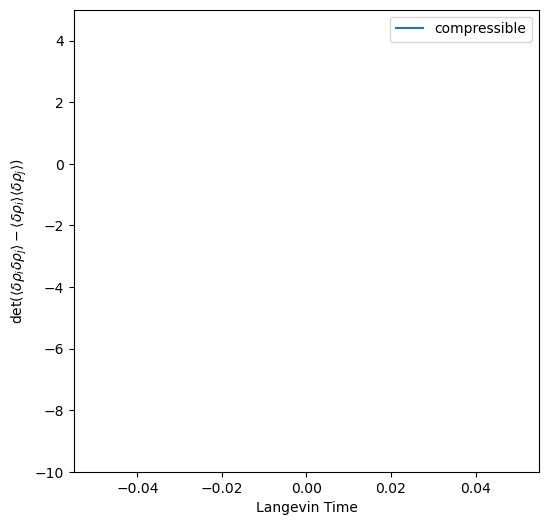

In [2]:
#process data get density profiles over time
# plot <density^2>-<density>^2
offset = 50
label = ['compressible','incompressible']
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))

for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:])/rho0,label = label[i])
    break
plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
plt.ylim(-10.0,5.0)

